## Documentation
### README

It should cover:

**How to set up folders and where each file is saved**
All files are save in a folder after extraction from the downloaded zip file

**Order in which to run code**
The code was written in *Jupyter* notebook, saved as .ipynb

**Explanations of features used**
All the features in the dataset was used for prediction after some EDA
Environment for the code to be run (conda environment.yml file or an environment.txt file)
Hardware needed (e.g. Google Colab or the specifications of your local machine)
Expected run time for each notebook. This will be useful to the review team for time and resource allocation.

In [1]:
#Import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew

In [2]:
#Write a wangle function for basic EDA
def wrangle(df_path):
    
    #Read the file into a dataframe
    data = pd.read_csv(df_path,low_memory=False)
    
    #Fill in the missing values for both variable types
    #for name in data.select_dtypes("number"):
         #data[name] = data[name].fillna(value=np.mean(data[name]))
    #for name in data.select_dtypes("object"):
        #data[name] = data[name].fillna("None")
        
    data = data.dropna() 
    #collect categorical features into a list
    cat_columns = data.dtypes[data.dtypes == "object"].index.to_list()
    
    #Use label encoder to encode the categorical features
    for c in cat_columns:
        label_encoder = LabelEncoder() 
        label_encoder.fit(list(data[c].values)) 
        data[c] = label_encoder.transform(list(data[c].values))
    return data

In [3]:
#Load the Train dataset and view the first 5 rows
train_df = wrangle('Housing_dataset_train.csv')
train_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,19,7,2.0,2.0,1.0,1149999.565
3,2224,3,3,5.0,2.0,4.0,2410306.756
7,3003,19,6,3.0,3.0,5.0,2043107.592
10,12573,26,1,1.0,2.0,6.0,1330213.036
11,2624,5,0,3.0,4.0,2.0,1891772.069


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5689 entries, 0 to 13997
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             5689 non-null   int64  
 1   loc            5689 non-null   int32  
 2   title          5689 non-null   int32  
 3   bedroom        5689 non-null   float64
 4   bathroom       5689 non-null   float64
 5   parking_space  5689 non-null   float64
 6   price          5689 non-null   float64
dtypes: float64(4), int32(2), int64(1)
memory usage: 311.1 KB


Skewness: 1.980322
Kurtosis: 7.966274



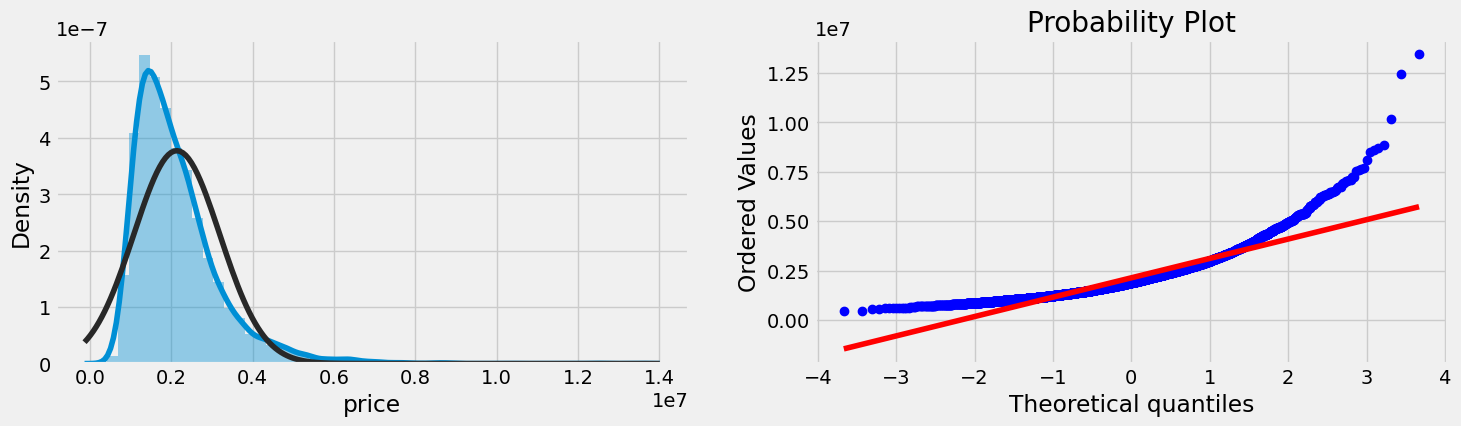

In [5]:
print("Skewness: %f" % train_df['price'].skew())
print("Kurtosis: %f" % train_df['price'].kurt())
print()
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.distplot(train_df['price'] , fit=norm, ax=ax[0])
#Get also the QQ-plot
res = stats.probplot(train_df['price'],plot=ax[1])
plt.show()

In [6]:
#Log transformation
train_df['price'] = np.log(train_df['price'])

Skewness: 0.274976
Kurtosis: -0.011820



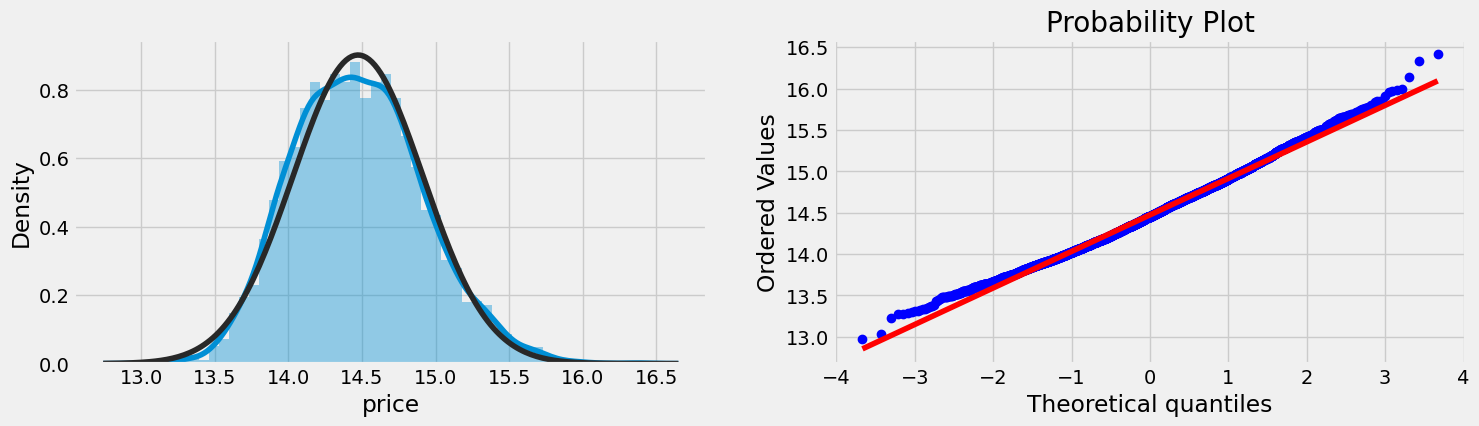

In [7]:
print("Skewness: %f" % train_df['price'].skew())
print("Kurtosis: %f" % train_df['price'].kurt())
print()
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.distplot(train_df['price'] , fit=norm, ax=ax[0])
#Get also the QQ-plot
res = stats.probplot(train_df['price'],plot=ax[1])
plt.show()

In [8]:
#Deriving the summary statistics of the train dataframe after the log transformation of the target columns
train_df.describe()

,ID,loc,title,bedroom,bathroom,parking_space,price
count,5689.000000,5689.000000,5689.000000,5689.000000,5689.000000,5689.000000,5689.000000
mean,4888.691158,17.582528,4.658112,4.280014,3.143962,3.151520,14.472637
std,3822.181293,10.360329,2.883949,2.427679,2.039221,1.615207,0.442543
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.976105
25%,1698.000000,9.000000,3.000000,2.000000,1.000000,2.000000,14.150711
50%,3565.000000,17.000000,5.000000,4.000000,2.000000,3.000000,14.455227
75%,7982.000000,27.000000,7.000000,6.000000,5.000000,4.000000,14.762244
max,12997.000000,35.000000,9.000000,9.000000,7.000000,6.000000,16.414447


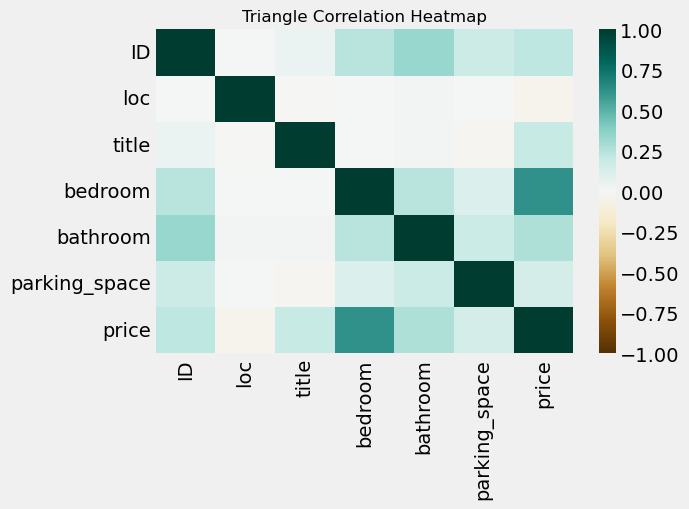

In [9]:
plt.figure(figsize=(6, 4))
# define the mask to set the values in the upper triangle to True
#mask = np.triu(np.ones_like(train_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=6);

In [10]:
# we drop the ID column
ID_train = train_df['ID']
train_df = train_df.drop(columns = 'ID',axis=1)

In [11]:
test_df = wrangle('Housing_dataset_test.csv')
test_df.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,18,6,4,1,2
1,1924,1,0,2,2,4
2,10718,1,1,2,7,2
3,12076,23,5,9,5,2
4,12254,14,7,5,6,1


In [12]:
ID_test = test_df['ID']
test_df = test_df.drop(columns = 'ID',axis=1)

In [13]:
target = "price"
y_train = train_df[target]
X_train = train_df.drop(columns=target,axis=1)
print(X_train.shape,y_train.shape)

(5689, 5) (5689,)


In [14]:
#Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(test_df)

In [15]:
#Test several model, the model with the best R square score is used
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score
from sklearn.metrics import mean_squared_error


#def test_model(model, X_train=X_train, y_train=y_train):
   # cv = KFold(n_splits=7,shuffle=True,random_state=42)
   # r2 = make_scorer(r2_score)
   # r2_val_score = cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    #score = [r2_val_score.mean()]
    #return score

In [18]:
 # Metric for Housing price prediction is RMSLE (Root Mean Squared Log Error)
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=7,shuffle=True,random_state=42)
    r2 = make_scorer(r2_score)
    log_y = np.log(y_train)
    score = cross_val_score(
        model,X_train, log_y, cv=5, scoring="neg_mean_squared_error",error_score="raise",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

def score_dataset(X, y, model):
    # Label encoding for categoricals
    ## Label encoding is good for XGBoost and RandomForest.
    for colname in X.select_dtypes(["category"]):
        X[colname] = X[colname].cat.codes
    # Metric for Housing price prediction is RMSLE (Root Mean Squared Log Error)
    log_y = np.log(y)
    score = cross_val_score(
        model, X, log_y, cv=5, scoring="neg_mean_squared_error",error_score="raise",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [19]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state = 42,max_depth=15)
RF.fit(X_train,y_train)
test_model(RF)

0.012028016649830922

In [20]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

DTree = DecisionTreeRegressor(max_depth=8)
DTree.fit(X_train,y_train)
test_model(DTree)

0.015349723119372834

In [21]:
#Decision Tree
from xgboost import XGBRegressor

xg = XGBRegressor()
xg.fit(X_train,y_train)
test_model(xg)

0.008396488932513324

In [22]:
y_test_pred = pd.Series(xg.predict(X_test))
y_test_pred.head()

0    14.706840
1    13.873295
2    14.003584
3    15.930083
4    14.436593
dtype: float32

In [23]:
pred=np.exp(xg.predict(X_test)).round(2)
pred

array([2438368.2, 1059486.5, 1206922. , ..., 1966142.1, 1346811.6,
       3409057.5], dtype=float32)

In [24]:
#redicted_value_4 = np.array(xgb.predict(X_test))
from sklearn.metrics import mean_squared_error
print(f"Mean Squared Error: {mean_squared_error(y_train, pred[:len(y_train)])}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred[:len(y_train)]))}")

Mean Squared Error: 5637782632719.339
Root Mean Squared Error: 2374401.5314852158


#check our accuracy score
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_train[:len(y_test_pred)],y_test_pred,squared=False)
error

In [25]:
submit_test = pd.concat([ID_test,pd.DataFrame(pred)],axis=1)
submit_test.columns = ['Id','SalePrice']
submit_test

,Id,SalePrice
0,845,2438368.250
1,1924,1059486.500
2,10718,1206922.000
3,12076,8286045.000
4,12254,1860941.500
...,...,...
5995,1594,1681307.000
5996,2416,2044871.875
5997,10195,1966142.125
5998,9455,1346811.625


In [26]:
submit_test.to_csv('submission.csv', index=False)

In [ ]:
coefficients = RF.feature_importances_
features = X_train.columns
feat_imp = pd.Series(coefficients,index=features).sort_values(key=abs).tail()
# Build bar chart for the 5 most influential coefficients of the model
feat_imp.plot(kind="barh")
# Label axes
plt.xlabel("Importance [Naira]")
plt.ylabel("Feature")
# Add title
plt.title("Feature Importances for Apartment Price");